In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
import warnings

warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import StandardScaler


file_path = r"C:\Users\30393\Desktop\data.xlsx"
df = pd.read_excel(file_path, sheet_name='Dec_TA')


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
means = scaler.mean_
stds = scaler.scale_


stats_df = pd.DataFrame({
    'Column': numerical_columns,
    'Mean': means,
    'Std': stds
})


print(stats_df)

output_file_path = r"C:\Users\30393\Desktop\Dec_TA_scaler.xlsx"
df.to_excel(output_file_path, index=False)

      Column        Mean        Std
0       Year    2.031746   0.860077
1          R  105.865079  11.214553
2          G  126.494709   8.700178
3          B   41.941799  11.010063
4         NR    0.385434   0.024532
5         NG    0.461379   0.017396
6         NB    0.153187   0.039817
7         GB    3.262799   1.054993
8         RB    2.743929   0.940980
9         GR    1.199568   0.047431
10        BI   98.550054   7.159659
11       BIM   13.515767   0.437915
12       SCI   -0.090303   0.019830
13       GLI    0.262471   0.032638
14        HI    0.480970   0.165976
15     NGRDI    0.090303   0.019830
16     NDGBI    0.505661   0.109835
17     NDRBI    0.435004   0.130067
18         I  274.301587  17.605887
19         S    0.540439   0.119451
20      VARI    0.112274   0.029832
21       HUE   -1.566765   0.000842
22      HUE2   -1.567782   0.000239
23       BGI    0.335554   0.099332
24         L   91.433862   5.868629
25      GRAY  110.687418   7.919085
26      GLAI    4.056856   0

In [4]:
df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TA_scaler.xlsx")
from sklearn.model_selection import train_test_split

X = df.drop(['Year', 'Number', 'TA(mg/g)'], axis=1)
y = df['TA(mg/g)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
'Feature': X.columns,
'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_sixteen_features_df = feature_importance_df.head(16)

print(top_sixteen_features_df)

   Feature  Importance
22     BGI    0.226011
5       NB    0.182820
18       S    0.112693
28      RI    0.063902
16   NDRBI    0.061637
7       RB    0.043521
15   NDGBI    0.036474
27     SHP    0.036197
12     GLI    0.028973
2        B    0.027220
4       NG    0.020329
26      CI    0.018513
6       GB    0.018135
36      a*    0.017254
33   GminB    0.010820
21    HUE2    0.008095


In [6]:
output_file = 'top_sixteen_features_Dec_TA.xlsx'

try:
    
    top_sixteen_features_df.to_excel(output_file, index=False)
    print(f"\nThe first 16 important features have been successfully saved {output_file}")
    
except Exception as e:
    
    print(f"\nSave Failed: {e}")


The first 16 important features have been successfully saved top_sixteen_features_Dec_TA.xlsx


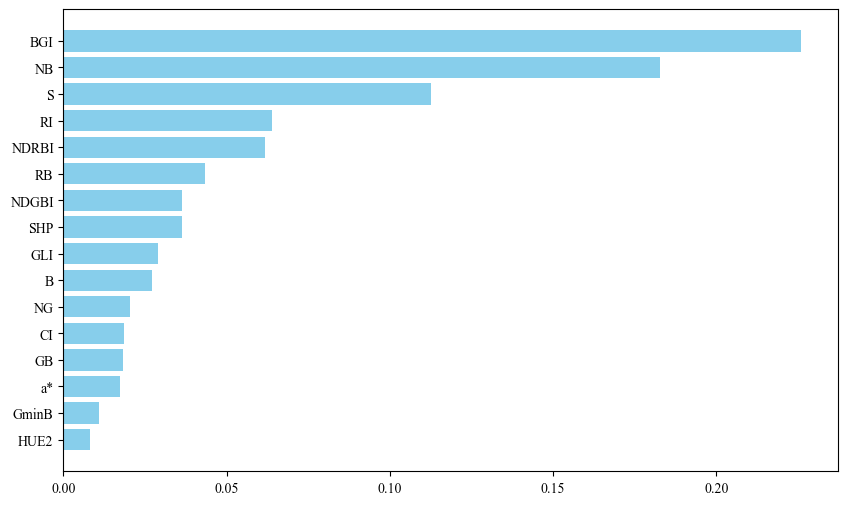

In [7]:
import os
plt.figure(figsize=(10, 6))
plt.barh(top_sixteen_features_df['Feature'], top_sixteen_features_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  
plt.savefig('Dec_TA_a.jpg', dpi=600, bbox_inches='tight')
plt.show()

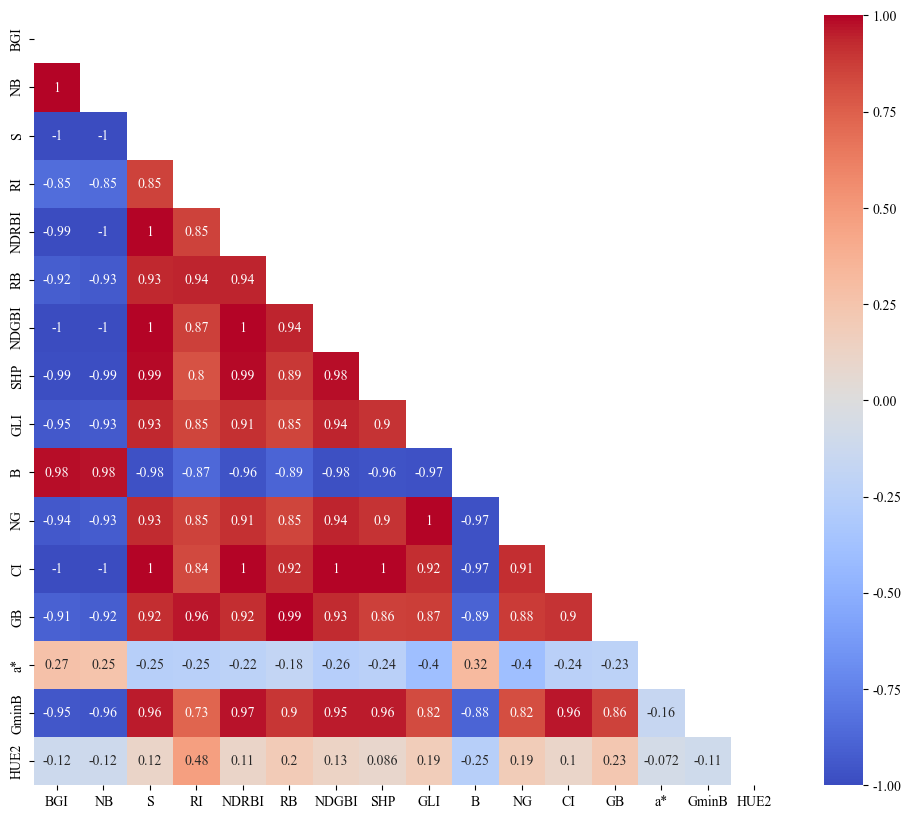

In [8]:
import seaborn as sns

correlation_matrix = X.corr(method='pearson')
top_sixteen_features = top_sixteen_features_df['Feature']



final_corr_matrix = correlation_matrix.loc[top_sixteen_features, top_sixteen_features]



plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(final_corr_matrix, dtype=bool))
sns.heatmap(final_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)

plt.savefig('Dec_TA_b.jpg', dpi=600, bbox_inches='tight')

plt.show()


In [9]:
import pandas as pd

def select_top_features_by_correlation(corr_matrix, features, feature_importance_df, threshold=0.95):
    high_corr_pairs = []
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if abs(corr_matrix.loc[features[i], features[j]]) > threshold:
                high_corr_pairs.append((features[i], features[j]))

    features_to_remove = set()

    for pair in high_corr_pairs:
        importance_1 = feature_importance_df[feature_importance_df['Feature'] == pair[0]]['Importance'].values[0]
        importance_2 = feature_importance_df[feature_importance_df['Feature'] == pair[1]]['Importance'].values[0]

        if importance_1 < importance_2:
            features_to_remove.add(pair[0])
        else:
            features_to_remove.add(pair[1])

    filtered_features = [feature for feature in features if feature not in features_to_remove]
    return filtered_features

sorted_features = list(top_sixteen_features_df['Feature'][:16])

final_features = select_top_features_by_correlation(correlation_matrix, sorted_features, top_sixteen_features_df, threshold=0.95)
print(final_features)

['BGI', 'RI', 'RB', 'GLI', 'a*', 'HUE2']


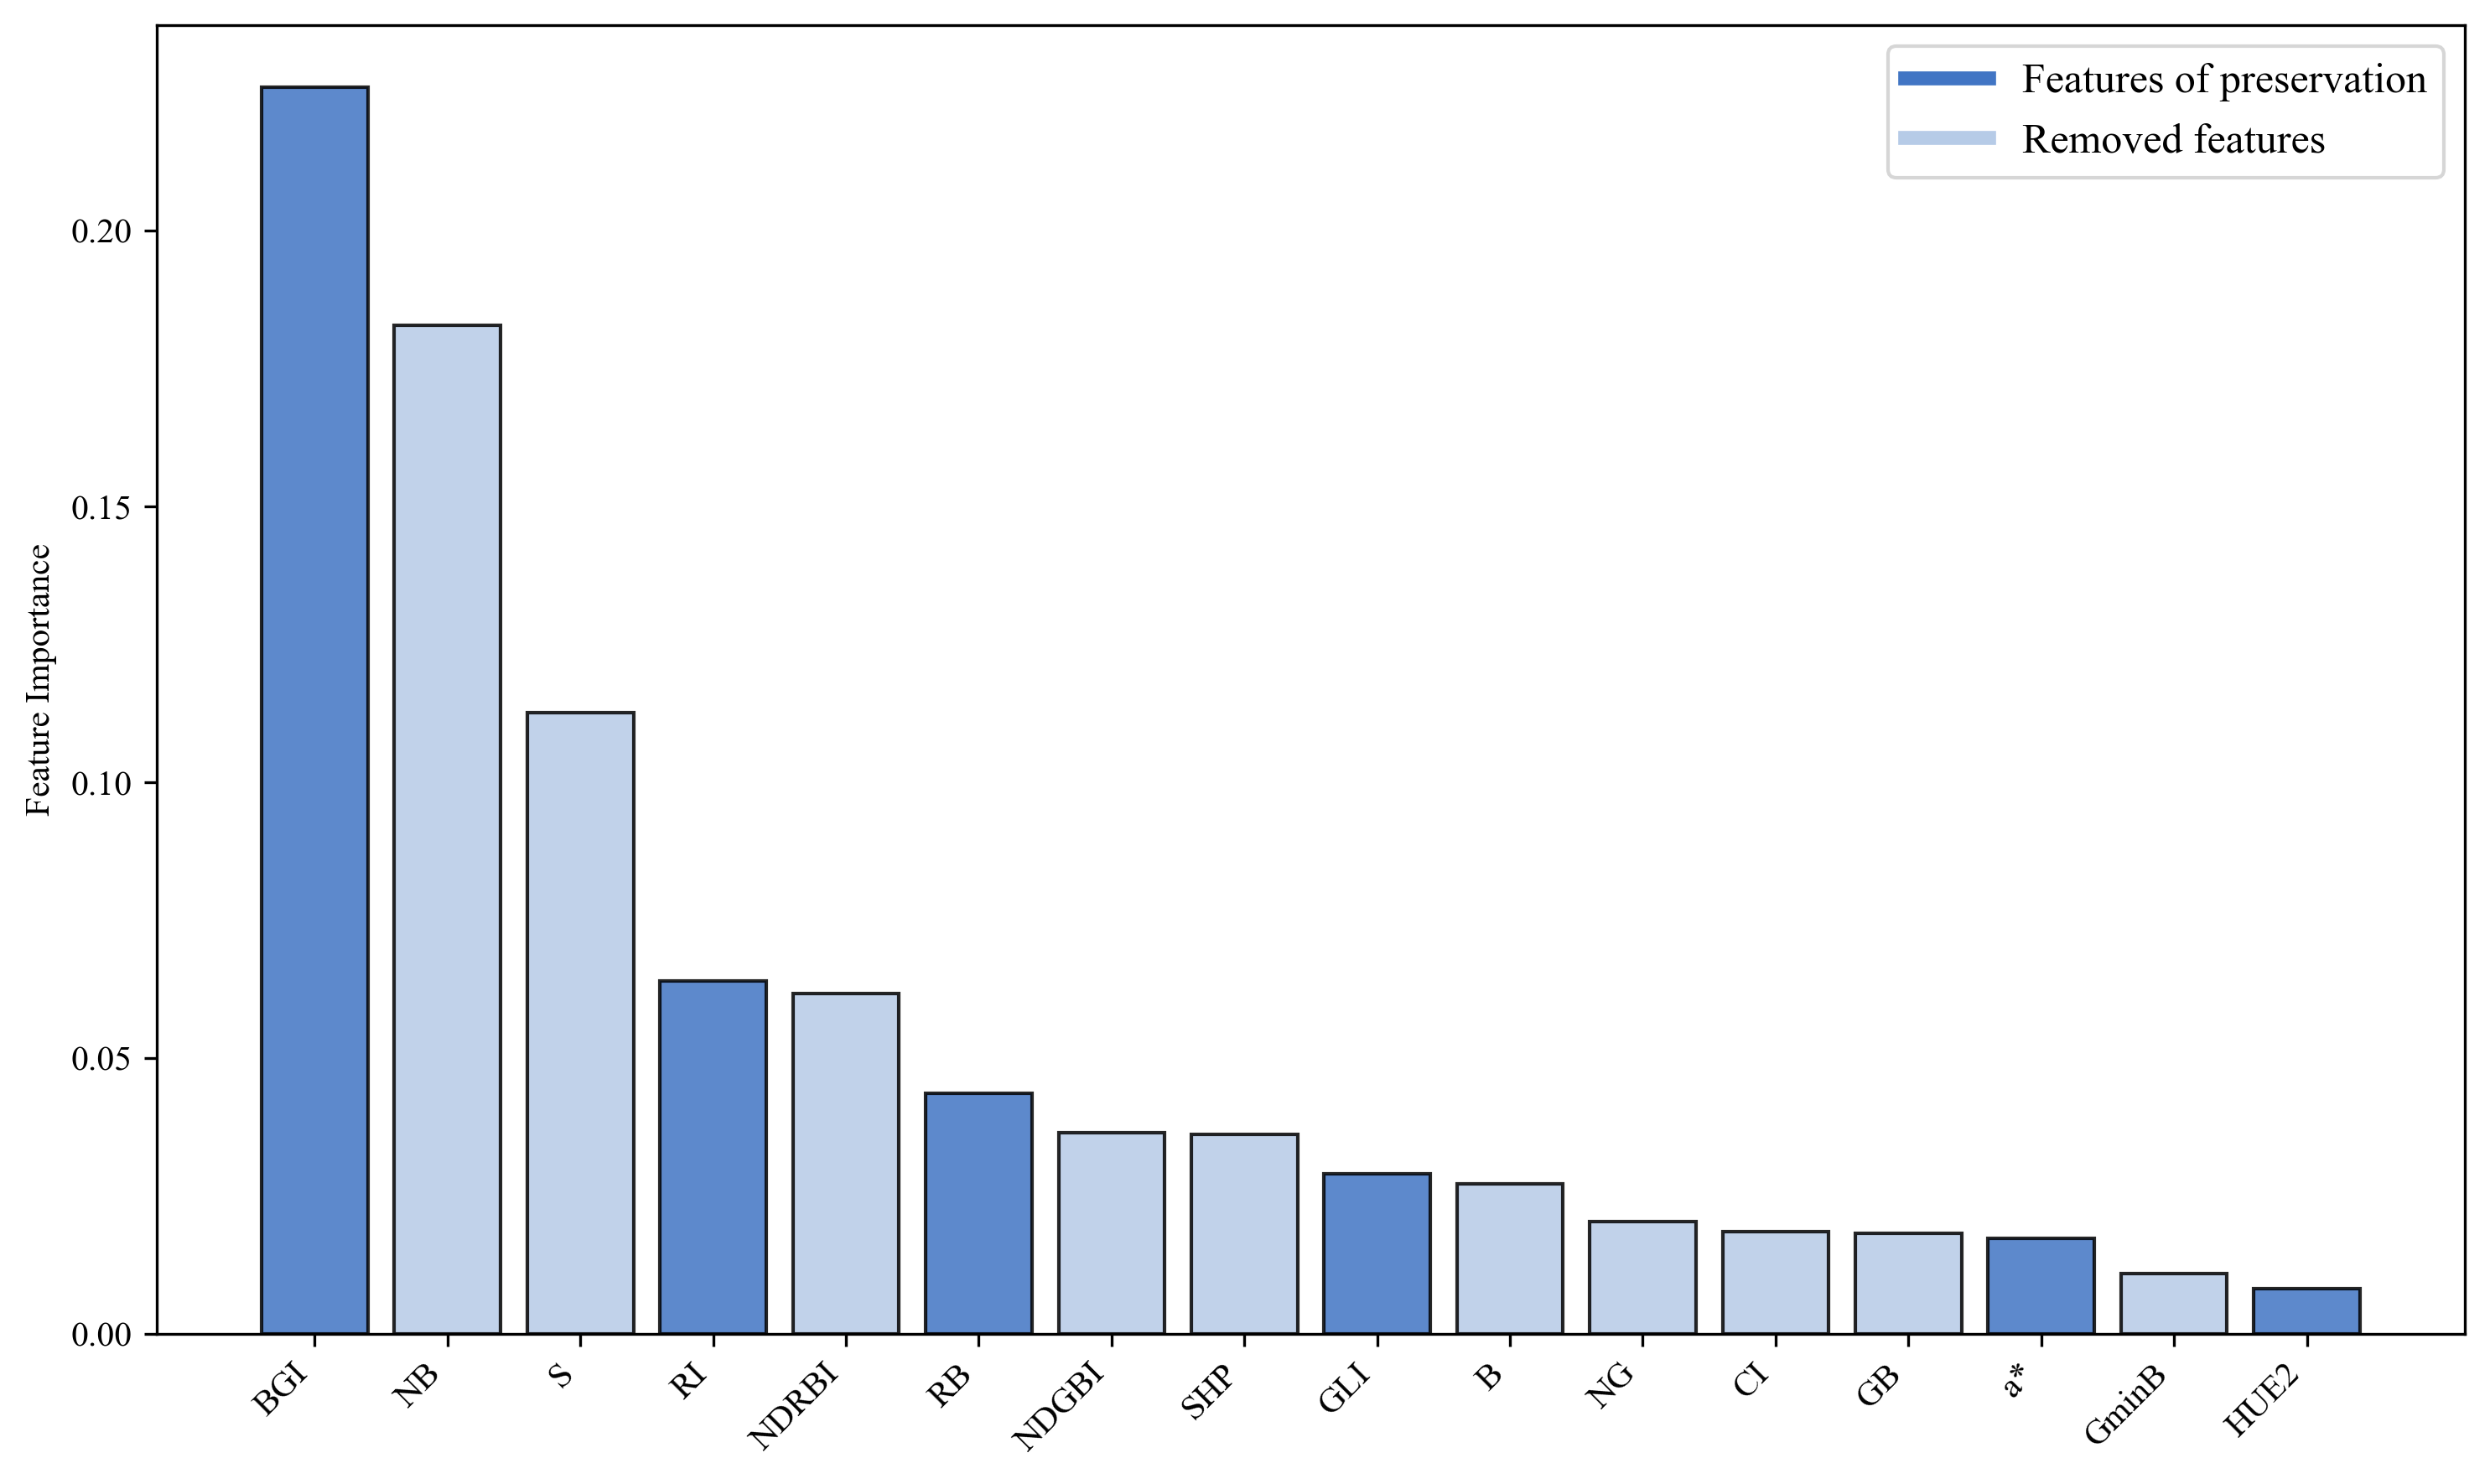

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = top_sixteen_features_df['Feature'].tolist()
feature_importances = feature_importance_df.iloc[0:16]['Importance']
selected_features = final_features

colors = [(65 / 255, 117 / 255, 196 / 255) if feature in selected_features else (182 / 255, 203 / 255, 231 / 255) 
          for feature in feature_names]

plt.figure(figsize=(10, 6), dpi=300)
bars = plt.bar(feature_names, feature_importances, color=colors, edgecolor='black', alpha=0.85)

red_patch = plt.Line2D([0], [0], color=(65 / 255, 117 / 255, 196 / 255), lw=4, label='Features of preservation')  
blue_patch = plt.Line2D([0], [0], color=(182 / 255, 203 / 255, 231 / 255), lw=4, label='Removed features')  
plt.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=12)

plt.ylabel('Feature Importance', fontsize=10)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.savefig('Dec_TA_c.jpg', dpi=600)
plt.show()

In [ ]:
#RF




In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    rf_model = RandomForestRegressor(random_state=42)
    
    cv_scores = cross_val_score(
        estimator=rf_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                    Features  Num_Features  CV Mean R^2
0        [RI, GLI, a*, HUE2]             4     0.831859
1       [BGI, GLI, a*, HUE2]             4     0.828203
2         [BGI, RB, GLI, a*]             4     0.827924
3   [BGI, RI, GLI, a*, HUE2]             5     0.827886
4   [BGI, RB, GLI, a*, HUE2]             5     0.825219
..                       ...           ...          ...
58                     [GLI]             1     0.748911
59                      [RB]             1     0.732582
60                [a*, HUE2]             2    -0.029655
61                      [a*]             1    -0.352060
62                    [HUE2]             1    -0.382708

[63 rows x 3 columns]


best_combination is: ['RI', 'GLI', 'a*', 'HUE2']


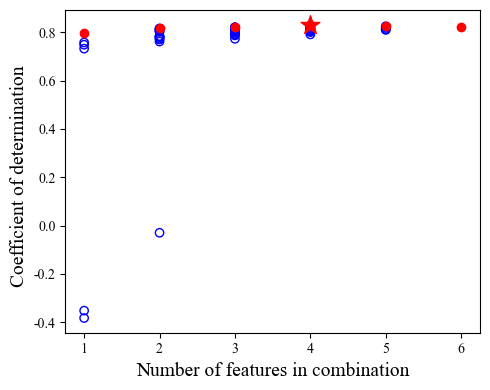

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TA_d.jpg', dpi=600)
plt.show()

In [ ]:
#svr




In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    svr_model = SVR(kernel='rbf')
    
    cv_scores = cross_val_score(
        estimator=svr_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

              Features  Num_Features  CV Mean R^2
0            [RB, GLI]             2     0.850105
1       [BGI, RB, GLI]             3     0.849519
2   [BGI, RI, RB, GLI]             4     0.848034
3        [BGI, RI, RB]             3     0.846559
4        [RI, RB, GLI]             3     0.845970
..                 ...           ...          ...
58           [GLI, a*]             2     0.781342
59     [GLI, a*, HUE2]             3     0.772506
60          [a*, HUE2]             2     0.073736
61                [a*]             1     0.046549
62              [HUE2]             1    -0.199920

[63 rows x 3 columns]


best_combination is: ['RB', 'GLI']


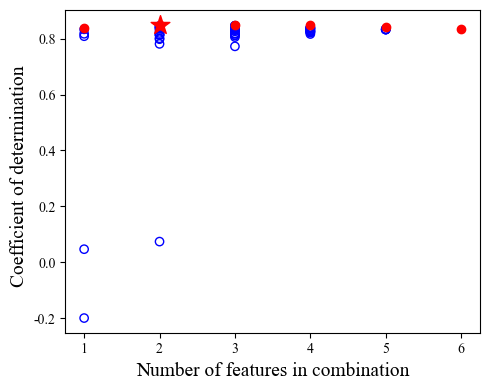

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TA_e.jpg', dpi=600)
plt.show()

In [ ]:
#mlp




In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    mlp_model = MLPRegressor(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
        random_state=42,
        max_iter=200,
        early_stopping=True,
        n_iter_no_change=10,
        validation_fraction=0.1
    )
    
    cv_scores = cross_val_score(
        estimator=mlp_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                   Features  Num_Features  CV Mean R^2
0            [BGI, RB, GLI]             3     0.830648
1             [BGI, RI, RB]             3     0.829880
2             [RI, RB, GLI]             3     0.829369
3              [RI, RB, a*]             3     0.827882
4       [BGI, RI, RB, HUE2]             4     0.821218
..                      ...           ...          ...
58               [RI, HUE2]             2     0.654518
59  [RI, RB, GLI, a*, HUE2]             5     0.640609
60                     [a*]             1     0.087550
61               [a*, HUE2]             2     0.068221
62                   [HUE2]             1     0.008803

[63 rows x 3 columns]


best_combination is: ['BGI', 'RB', 'GLI']


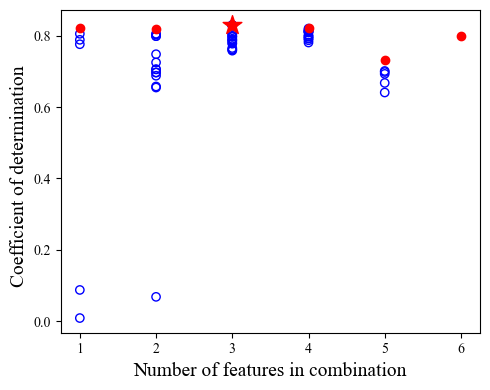

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TA_f.jpg', dpi=600)
plt.show()

In [ ]:
#xgb




In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    xgb_model = XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(
        estimator=xgb_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

              Features  Num_Features  CV Mean R^2
0        [BGI, RB, a*]             3     0.804367
1       [BGI, GLI, a*]             3     0.791757
2      [BGI, a*, HUE2]             3     0.790010
3   [BGI, RB, GLI, a*]             4     0.787697
4        [RB, GLI, a*]             3     0.786066
..                 ...           ...          ...
58                [RB]             1     0.677740
59               [GLI]             1     0.667370
60          [a*, HUE2]             2    -0.368951
61                [a*]             1    -0.638812
62              [HUE2]             1    -0.748406

[63 rows x 3 columns]


best_combination is: ['BGI', 'RB', 'a*']


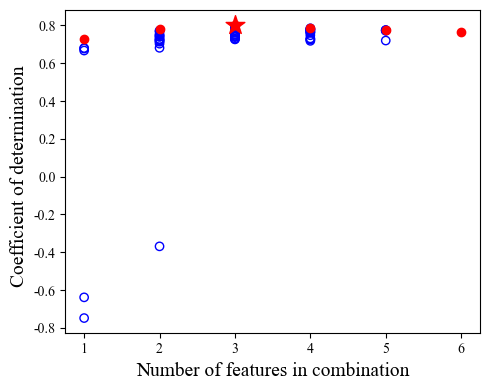

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TA_g.jpg', dpi=600)
plt.show()

In [ ]:
#lgb




In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    lgb_model = lgb.LGBMRegressor(
        objective='regression',
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(
        estimator=lgb_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

           Features  Num_Features  CV Mean R^2
0        [RI, HUE2]             2     0.846839
1   [RI, GLI, HUE2]             3     0.842929
2          [RI, RB]             2     0.837797
3    [RI, RB, HUE2]             3     0.835168
4              [RB]             1     0.834928
..              ...           ...          ...
58  [GLI, a*, HUE2]             3     0.770262
59        [GLI, a*]             2     0.760362
60             [a*]             1     0.057548
61       [a*, HUE2]             2     0.030044
62           [HUE2]             1     0.026854

[63 rows x 3 columns]


best_combination is: ['RI', 'HUE2']


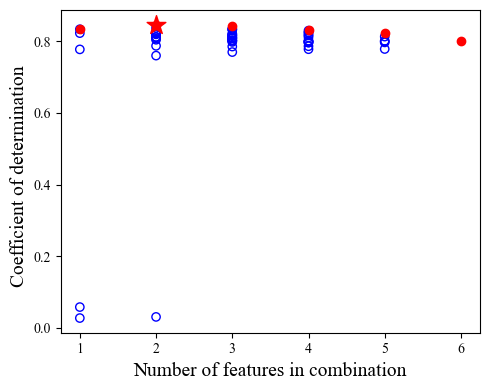

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TA_h.jpg', dpi=600)
plt.show()

In [21]:
#RF
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TA_scaler.xlsx")

selected_features = ['RI', 'GLI', 'a*', 'HUE2']
X = df[selected_features]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.815  0.8363 0.832  0.8816 0.7943], mean R² ± SD：0.8319 ± 0.0289
MAE ：[0.4084 0.2933 0.3447 0.2552 0.3098], mean MAE ± SD：0.3223 ± 0.0518
RMSE ：[0.4789 0.3809 0.4336 0.327  0.407 ], mean RMSE ± SD：0.4055 ± 0.0509


In [22]:
#svr
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TA_scaler.xlsx")

selected_features = ['RB', 'GLI']
X = df[selected_features]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR(kernel='rbf')

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.8103 0.8437 0.852  0.8957 0.8488], mean R² ± SD：0.8501 ± 0.0272
MAE ：[0.3921 0.2868 0.3259 0.2283 0.2569], mean MAE ± SD：0.298 ± 0.0571
RMSE ：[0.485  0.3722 0.407  0.3069 0.3489], mean RMSE ± SD：0.384 ± 0.0601


In [23]:
#mlp
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TA_scaler.xlsx")

selected_features = ['RB', 'GLI']
X = df[selected_features]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_model = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=200,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.3733 0.8276 0.8432 0.8702 0.8254], mean R² ± SD：0.7479 ± 0.188
MAE ：[0.6249 0.2972 0.3212 0.2692 0.2851], mean MAE ± SD：0.3595 ± 0.1338
RMSE ：[0.8816 0.3909 0.4189 0.3424 0.375 ], mean RMSE ± SD：0.4818 ± 0.2015


In [24]:
#xgb
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TA_scaler.xlsx")

selected_features = ['BGI', 'RB', 'a*']
X = df[selected_features]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.7839 0.6746 0.8466 0.9008 0.8159], mean R² ± SD：0.8044 ± 0.0755
MAE ：[0.4437 0.3815 0.3338 0.2339 0.3007], mean MAE ± SD：0.3387 ± 0.0711
RMSE ：[0.5177 0.5371 0.4143 0.2993 0.3851], mean RMSE ± SD：0.4307 ± 0.0878


In [26]:
#lgb
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TA_scaler.xlsx")

selected_features = ['RI', 'HUE2']
X = df[selected_features]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor(
    objective='regression',
    random_state=42,
    verbose=-1,
    n_jobs=-1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.8504 0.8877 0.8401 0.8614 0.7946], mean R² ± SD：0.8468 ± 0.0306
MAE ：[0.3456 0.25   0.3537 0.2602 0.3227], mean MAE ± SD：0.3064 ± 0.0433
RMSE ：[0.4307 0.3155 0.423  0.3538 0.4067], mean RMSE ± SD：0.386 ± 0.0443


In [ ]:
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model

In [28]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Categorical

X = df[['RB', 'GLI']]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR()

search_space = {
    'C': Real(0.5, 1, prior='log-uniform'),
    'kernel': Categorical(['rbf']),
    'epsilon': Real(0.01, 0.5, prior='uniform'),
    'shrinking': Categorical([True]),
    'gamma': Real(0.01, 0.05, prior='log-uniform'),
}

bayes_search = BayesSearchCV(
    estimator=svr,
    search_spaces=search_space,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

bayes_search.fit(X_train, y_train)

best_params = bayes_search.best_params_
print(best_params)

best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

test_r2 = r2_score(y_test, y_pred)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_pred)

train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"test R2 : {test_r2:.4f}")
print(f"test RMSE : {test_rmse:.4f}")
print(f"test MAE : {test_mae:.4f}")
print(f"train R2 : {train_r2:.4f}")
print(f"train RMSE : {train_rmse:.4f}")
print(f"train MAE : {train_mae:.4f}")

OrderedDict({'C': 1.0, 'epsilon': 0.227861075123826, 'gamma': 0.049999999999999996, 'kernel': 'rbf', 'shrinking': True})
test R2 : 0.7632
test RMSE : 0.4837
test MAE : 0.3447
train R2 : 0.8214
train RMSE : 0.4231
train MAE : 0.3279


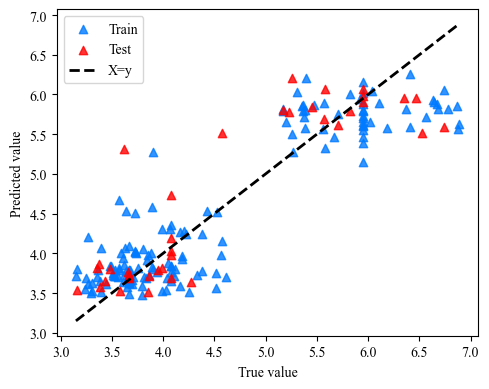

In [29]:
import numpy as np
import matplotlib.pyplot as plt

mean_value = 4.544187
std_value = 1.092744 

y_train_original = y_train * std_value + mean_value
y_train_pred_original = y_train_pred * std_value + mean_value

y_test_original = y_test * std_value + mean_value
y_pred_original = y_pred * std_value + mean_value

plt.figure(figsize=(5, 4))

plt.scatter(y_train_original, y_train_pred_original, alpha=0.8, label='Train', color='#007AFF', marker='^')
plt.scatter(y_test_original, y_pred_original, alpha=0.8, label='Test', color='r', marker='^')

min_val = min(y_train_original.min(), y_test_original.min())
max_val = max(y_train_original.max(), y_test_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='X=y')

plt.xlabel('True value')
plt.ylabel('Predicted value')

plt.legend()

plt.tight_layout()
plt.savefig('Dec_TA_i.jpg', dpi=600)
plt.show()

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TA_scaler.xlsx")

model_features = {
    'RF': ['RI', 'GLI', 'a*', 'HUE2'],
    'SVR': ['RB', 'GLI'],
    'MLP': ['BGI', 'RB', 'GLI'],
    'XGBoost': ['BGI', 'RB', 'a*'],
    'LightGBM': ['RI', 'HUE2'],
}

all_required_features = list(set([f for features in model_features.values() for f in features]))

X = df[all_required_features]
y = df['TA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = {
    'RF': {
        'model': RandomForestRegressor(
            n_estimators=30,
            max_depth=3,
            random_state=42
        ),
        'use_scaler': False
    },
    'SVR': {
        'model': SVR(
            kernel='linear',
            C=500,
        ),
        'use_scaler': False
    },
    'MLP': {
        'model': MLPRegressor(
            hidden_layer_sizes=(10, 5),
            activation='logistic',
            alpha=0.1,
            max_iter=100,
            random_state=42
        ),
        'use_scaler': False
    },
    'XGBoost': {
        'model': XGBRegressor(
            n_estimators=50,
            max_depth=3,
            learning_rate=0.1,
            random_state=42
        ),
        'use_scaler': False
    },
    'LightGBM': {
        'model': LGBMRegressor(
            n_estimators=300,
            max_depth=3,
            learning_rate=0.1,
            verbose=-1,
            random_state=42
        ),
        'use_scaler': False
    }
}

def generate_oof_predictions(model, X, y, features, n_splits=5):
    oof_preds = np.zeros(len(y))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for train_idx, val_idx in kf.split(X):
        X_train_fold = X.iloc[train_idx][features].values
        y_train_fold = y.iloc[train_idx].values.ravel()
        X_val_fold = X.iloc[val_idx][features].values
        
        model.fit(X_train_fold, y_train_fold)
        oof_preds[val_idx] = model.predict(X_val_fold)
    
    return oof_preds

optimized_models = {}

for name, model_info in base_models.items():
    print(f"\ntrain {name} model (feature: {model_features[name]})...")
    features = model_features[name]
    X_train_subset = X_train[features]
    model = model_info['model']
    model.fit(X_train_subset, y_train)
    optimized_models[name] = {
        'model': model,
        'features': features
    }

meta_features_train = []

for name, model_info in optimized_models.items():
    print(f"being {name} OOF...")
    oof_pred = generate_oof_predictions(
        model_info['model'], 
        X_train, 
        y_train, 
        model_info['features']
    )
    meta_features_train.append(oof_pred.reshape(-1, 1))

meta_features_train = np.hstack(meta_features_train)

meta_model = Lasso(random_state=42)

param_bayes = {
    'alpha': Real(0.2, 10, prior='log-uniform'),
    'fit_intercept': Categorical([True]),
}

bayes_search = BayesSearchCV(
    meta_model, 
    param_bayes, 
    n_iter=10, 
    cv=5, 
    scoring='r2', 
    random_state=42, 
    n_jobs=-1
)

bayes_search.fit(meta_features_train, y_train.values.ravel())
best_meta_model = bayes_search.best_estimator_

print(f"\nmodel-param: {bayes_search.best_params_}")
print(f"model-R2: {bayes_search.best_score_:.4f}")

meta_features_test = []

for name, model_info in optimized_models.items():
    model = model_info['model']
    features = model_info['features']
    model.fit(X_train[features].values, y_train.values.ravel())
    test_pred = model.predict(X_test[features].values).reshape(-1, 1)
    meta_features_test.append(test_pred)

meta_features_test = np.hstack(meta_features_test)

final_pred = best_meta_model.predict(meta_features_test)

test_r2 = r2_score(y_test, final_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, final_pred))
test_mae = mean_absolute_error(y_test, final_pred)

print("\ntest:")
print(f"R2: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")

final_train_pred = best_meta_model.predict(meta_features_train)
train_r2 = r2_score(y_train, final_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, final_train_pred))
train_mae = mean_absolute_error(y_train, final_train_pred)

print("\ntrain:")
print(f"R2: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")


train RF model (feature: ['RI', 'GLI', 'a*', 'HUE2'])...

train SVR model (feature: ['RB', 'GLI'])...

train MLP model (feature: ['BGI', 'RB', 'GLI'])...

train XGBoost model (feature: ['BGI', 'RB', 'a*'])...

train LightGBM model (feature: ['RI', 'HUE2'])...
being RF OOF...
being SVR OOF...
being MLP OOF...
being XGBoost OOF...
being LightGBM OOF...

model-param: OrderedDict({'alpha': 0.20286063416113317, 'fit_intercept': True})
model-R2: 0.8029

test:
R2: 0.8199
RMSE: 0.4218
MAE: 0.3210

train:
R2: 0.8093
RMSE: 0.4372
MAE: 0.3518


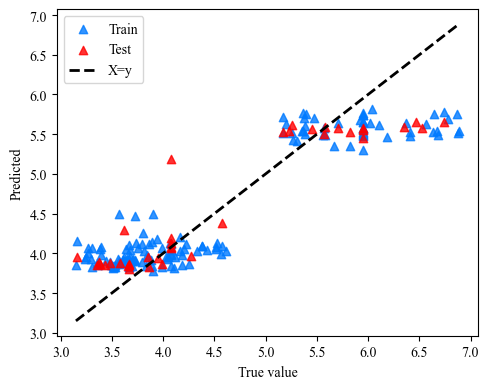

In [32]:
import numpy as np
import matplotlib.pyplot as plt
mean_value = 4.544187
std_value = 1.092744 

y_train_original = y_train * std_value + mean_value
y_train_pred_original = final_train_pred * std_value + mean_value

y_test_original = y_test * std_value + mean_value
y_pred_original = final_pred * std_value + mean_value

plt.figure(figsize=(5, 4))

plt.scatter(y_train_original, y_train_pred_original, alpha=0.8, label='Train', color='#007AFF', marker='^')
plt.scatter(y_test_original, y_pred_original, alpha=0.8, label='Test', color='r', marker='^')

min_val = min(y_train_original.min(), y_test_original.min())
max_val = max(y_train_original.max(), y_test_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='X=y')

plt.xlabel('True value')
plt.ylabel('Predicted')
plt.legend()
plt.tight_layout()
plt.savefig('Dec_TA_j.jpg', dpi=300)
plt.show()

RF: 0.6432
SVR: 0.0000
MLP: 0.0000
XGBoost: 0.0430
LightGBM: 0.0175


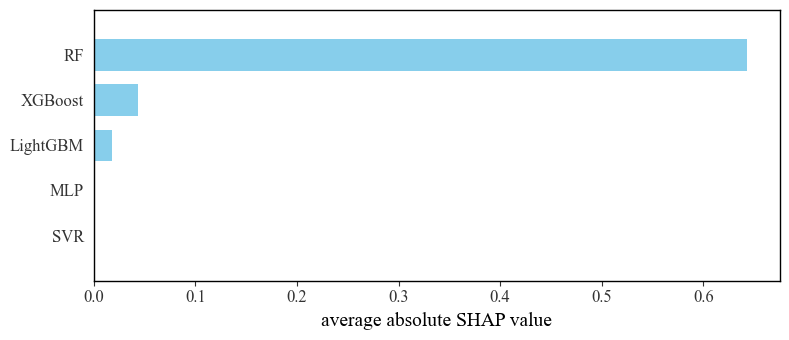

In [33]:
import shap
import matplotlib.pyplot as plt
import numpy as np

base_model_names = ['RF', 'SVR', 'MLP', 'XGBoost', 'LightGBM']

explainer = shap.LinearExplainer(best_meta_model, meta_features_train)
shap_values = explainer.shap_values(meta_features_test)

mean_abs_shap = np.mean(np.abs(shap_values), axis=0)


for model_name, shap_val in zip(base_model_names, mean_abs_shap):
    print(f"{model_name}: {shap_val:.4f}")

shap.summary_plot(
    shap_values, 
    meta_features_test, 
    feature_names=base_model_names,
    plot_type="bar",
    color='skyblue',  
    show=False
)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.xlabel("average absolute SHAP value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Dec_TA_k.png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()

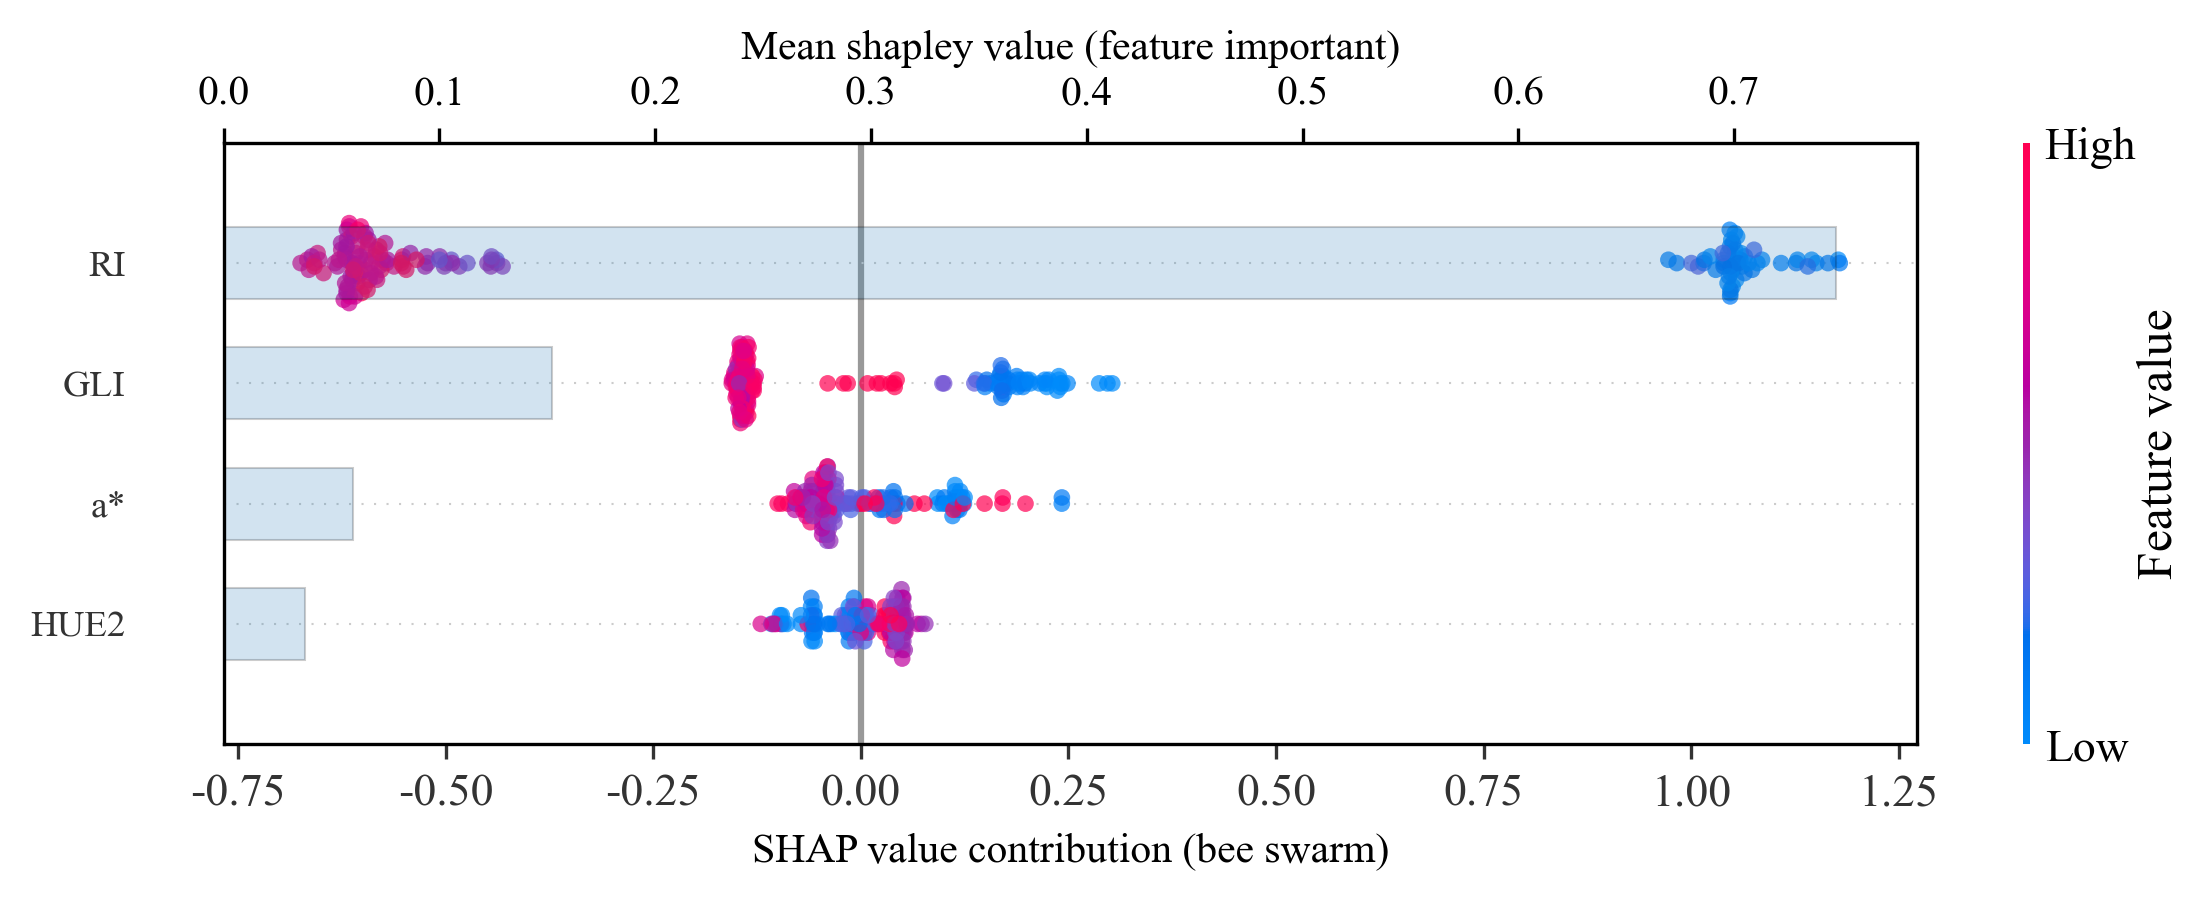

In [34]:
import shap
import matplotlib.pyplot as plt
import numpy as np

rf_model = optimized_models['RF']['model']
rf_features = model_features['RF']

X_train_rf = X_train[rf_features]

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_rf)

mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
sorted_indices = np.argsort(mean_abs_shap)[::-1]
sorted_features = [rf_features[i] for i in sorted_indices]

sorted_shap_values = shap_values[:, sorted_indices]
sorted_X_train = X_train_rf[sorted_features]
sorted_mean_abs = mean_abs_shap[sorted_indices]

plt.figure(figsize=(12, 8), dpi=300)
plt.rcParams.update({'font.size': 10, 'font.family': 'Times New Roman'})

shap.summary_plot(
    sorted_shap_values,
    sorted_X_train,
    feature_names=sorted_features,
    plot_type="dot",
    show=False,
    sort=False,
    alpha=0.7
)
ax1 = plt.gca()
ax1.set_ylabel('')
ax1.tick_params(axis='y', labelsize=9)
ax1.set_xlabel('SHAP value contribution (bee swarm)', fontsize=10)

ax2 = ax1.twiny()
ax2.grid(False)
ax2.set_ylim(ax1.get_ylim())

y_pos = np.arange(len(sorted_features))[::-1]  
bars = ax2.barh(
    y=y_pos,
    width=sorted_mean_abs,
    height=0.6,
    color='#1f77b4',
    alpha=0.2,
    edgecolor='black',
    linewidth=0.5
)

ax2.set_xlabel('Mean shapley value (feature important)', fontsize=10)
ax2.xaxis.set_label_position('top')
ax2.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False
)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('Dec_TA_l.png', bbox_inches='tight')
plt.show()

In [35]:
print("\nFeature importance (mean absolute SHAP value):")
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
for i, feature in enumerate(rf_features):
    print(f"{feature}: {mean_abs_shap[i]:.4f}")


Feature importance (mean absolute SHAP value):
RI: 0.7473
GLI: 0.1520
a*: 0.0597
HUE2: 0.0377
